### 导入必要的包

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from matplotlib.font_manager import FontManager
from statsmodels.formula.api import ols
import math

import warnings
warnings.filterwarnings("ignore")

### 加载留存的数据源

In [3]:
df = pd.read_csv('./query_result (2).csv')
df # 每一列是第N日留存，共30天的数据

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
0,0.533,0.401,0.350,0.329,0.294,0.230,0.201,0.177,0.169,0.162,...,0.087,0.085,0.091,0.087,0.098,0.100,0.081,0.072,0.069,0.067
1,0.544,0.397,0.337,0.297,0.237,0.204,0.168,0.158,0.147,0.143,...,0.068,0.066,0.068,0.074,0.080,0.060,0.057,0.056,0.052,0.052
2,0.528,0.390,0.338,0.267,0.218,0.177,0.160,0.148,0.142,0.129,...,0.059,0.061,0.063,0.070,0.054,0.052,0.049,0.047,0.046,0.052
3,0.509,0.367,0.256,0.208,0.169,0.150,0.146,0.145,0.128,0.094,...,0.060,0.071,0.070,0.049,0.048,0.043,0.042,0.048,0.056,0.052
4,0.514,0.246,0.190,0.151,0.131,0.154,0.193,0.151,0.077,0.068,...,0.085,0.086,0.039,0.038,0.036,0.035,0.044,0.067,0.061,0.027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,0.397,0.261,0.200,0.164,0.051,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,0.396,0.265,0.204,0.065,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,0.406,0.264,0.083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,0.414,0.121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_r = list()
for column in df.columns:
    df_r.append(df['{column}'.format(column = column)].median())
df = pd.DataFrame(df_r,index=[i for i in range(2,32)]).reset_index()

In [5]:
df.rename(columns={'index':'留存天数',0:'留存率'},inplace=True)# 更一下列名

In [6]:
df.dtypes #查看数据类型

留存天数      int64
留存率     float64
dtype: object

Text(0, 0.5, '留存率')

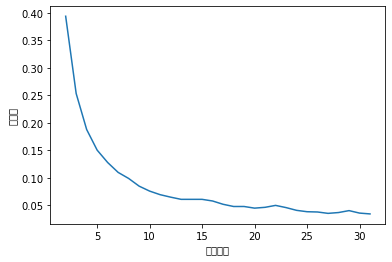

In [7]:
plt.plot(df['留存天数'],df['留存率'])
plt.xlabel('留存天数')
plt.ylabel('留存率')

两者满足：$y = ax^b$ 

#### 分别对留存天数、留存率取对数

In [8]:
df['d_ln'] = df['留存天数'].apply(lambda x:np.log(float(x)))
df['r_ln'] = df['留存率'].apply(lambda x:np.log(float(x)))

In [9]:
df

,留存天数,留存率,d_ln,r_ln
0,2,0.3940,0.693147,-0.931404
1,3,0.2535,1.098612,-1.372391
2,4,0.1880,1.386294,-1.671313
3,5,0.1505,1.609438,-1.893792
4,6,0.1280,1.791759,-2.055725
5,7,0.1100,1.945910,-2.207275
6,8,0.0990,2.079442,-2.312635
7,9,0.0850,2.197225,-2.465104
8,10,0.0760,2.302585,-2.577022
9,11,0.0695,2.397895,-2.666429


#### 再来看下对数变换后的两者见的关系

Text(0, 0.5, 'r_ln')

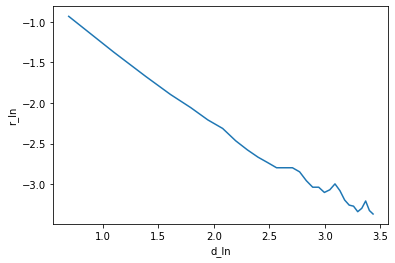

In [10]:
plt.plot(df['d_ln'],df['r_ln'])
plt.xlabel('d_ln')
plt.ylabel('r_ln')

两者呈现较强的线性关系，故考虑使用一元线性回归进行拟合

In [11]:
lm_s = ols('r_ln~d_ln',data=df).fit() # 使用statsmodel中ols函数进行拟合

In [12]:
[math.pow(np.e,i) for i in lm_s.predict(df['d_ln'])]

[0.32980409882548134,
 0.23420071809985132,
 0.18369896984381853,
 0.1521559401737661,
 0.13044844137728845,
 0.11452967017126542,
 0.10231926056060561,
 0.09263413873377507,
 0.08474997601630462,
 0.07819755169077035,
 0.07265902511241981,
 0.06791115382893505,
 0.06379236189586207,
 0.06018271244247552,
 0.05699123457562161,
 0.05414762875790958,
 0.05159667790171534,
 0.04929438515772836,
 0.04720524500431296,
 0.04530027679614206,
 0.04355558266577069,
 0.041951273176816566,
 0.040470655490763154,
 0.03909961194050706,
 0.03782611872838434,
 0.036639869119828014,
 0.03553197551487957,
 0.03449473172894635,
 0.033521421709011644,
 0.03260616440609636]

In [13]:
print(lm_s.params)

Intercept   -0.524056
d_ln        -0.844266
dtype: float64


系数为-0.844，截距为-0.524

用y表示留存率，x表示留存天数，则两者满足：$ln(y) = ln(a)+bln(x)$,这里的b = -0.8443，易得a = 0.5921

### 从而原函数满足：$y = 0.5921x^{-0.8443}$

In [14]:
def predict(x):
    y = 0.5921*math.pow(x,-0.8443)
    return y

### 观察拟合效果

In [15]:
df['predict_r'] = df['留存天数'].map(lambda x:predict(x))
df

,留存天数,留存率,d_ln,r_ln,predict_r
0,2,0.3940,0.693147,-0.931404,0.329788
1,3,0.2535,1.098612,-1.372391,0.234186
2,4,0.1880,1.386294,-1.671313,0.183686
3,5,0.1505,1.609438,-1.893792,0.152144
4,6,0.1280,1.791759,-2.055725,0.130437
5,7,0.1100,1.945910,-2.207275,0.114519
6,8,0.0990,2.079442,-2.312635,0.102310
7,9,0.0850,2.197225,-2.465104,0.092625
8,10,0.0760,2.302585,-2.577022,0.084741
9,11,0.0695,2.397895,-2.666429,0.078189


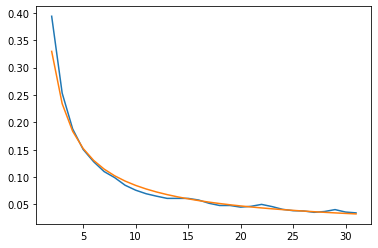

In [16]:
plt.plot(df['留存天数'],df['留存率'])
plt.plot(df['留存天数'],df['predict_r'])

#### 可见该函数较好的拟合了原始函数，通过计算函数图像与X轴围成的面积，便可得到用户的LT

In [17]:
from scipy import integrate

In [18]:
def func(x):
#     print("x = ",x) # 用于展示quad（）函数对func的多次调用
    return 0.5921*np.power(x,-0.8443)
fArea,err = integrate.quad(func,2,1080)
print("Integral area:",fArea)

Integral area: 7.046431162476022


这里的定积分上限取了三年，即1080天，计算出来的最终结果为：7.046

参考文章：https://zhuanlan.zhihu.com/p/112957154